# 3주차 Neural Network 과제는 인공신경망을 논리게이트부터 차례대로 쌓아올려 직접 짜보는 것입니다.
# 중간 중간 남겨진 주석을 따라 코드를 완성시켜 주세요

## 논리 게이트 구현

In [1]:
## AND gate 구현해주세요
# w1, w2 => 가중치(weight)를 의미하는 변수
# theta : threshold

def AND(x1, x2):

    if x1 * 1 + x2 >1:
        return 1
    else:
        return 0

def NAND(x1, x2):
    if -0.5 * x1 -0.5 * x2 > -1:
        return 1
    else:
        return 0


def OR(x1, x2):
    if x1 + x2 > 0.5:
        return 1
    else:
        return 0



# 위 논리 게이트를 조합하여 XOR gate 구현해주세요


## 활성함수 구현

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 입력할 샘플 데이터를 만들고 확인합니다.
x = np.array([-1, 1, 2])
print("input : ", x)

# 입력 값이 임계값(0)을 넘기는지 판단합니다.
y = x>0
print("Logic : ", y)

# 논리(boolean)형태를 정수형으로 바꾸어 0과 1로 나타냅니다.
y = y.astype(np.int)
print("Boolean : ", y)

input :  [-1  1  2]
Logic :  [False  True  True]
Boolean :  [0 1 1]


<ipython-input-2-31a9705d2168>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [5]:
# STEP 함수 구현
def step_function(x):
    if type(x) == int or type(x) == float:
        if x> 0:
            return 1
        else:
            return 0
    elif type(x) == np.ndarray: ## 추후 np.linspace를 받기 위해 설정
        y = x>0
        return y.astype(np.int)


# 함수가 제대로 만들어 졌는지 값을 출력해봅니다.
print(step_function(-1))	# 0
print(step_function(0.5))	# 1
print(step_function(500000))	# 1

0
1
1


<ipython-input-5-f727b8d20dbd>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


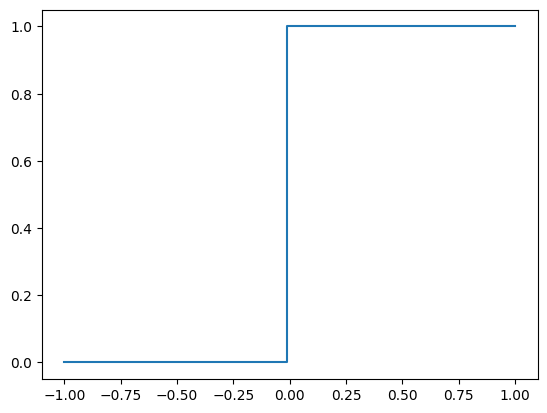

In [6]:
# 구현한 계단 함수의 값을 바탕으로 그래프를 그려봅시다.
x = np.linspace(-1, 1, 100)
plt.step(x, step_function(x))
plt.show()

[0.00669285 0.26894142 0.5        0.52497919 0.99330715 1.        ]


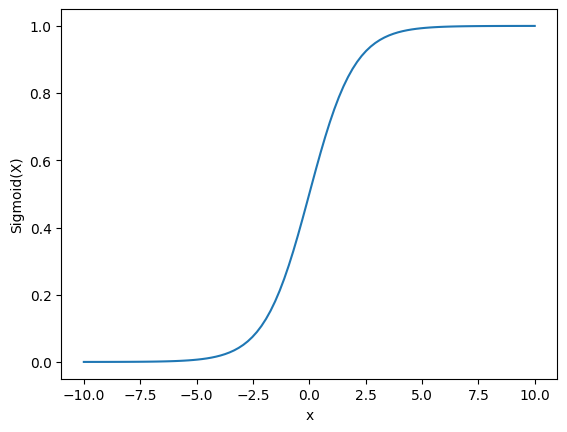

In [7]:
# Sigmoid 함수 구현
def sigmoid(x):
    return 1/(1+np.exp(-x))


x = np.array([-5, -1, 0, 0.1, 5, 500000])
print(sigmoid(x))

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.66453526e-15 1.00000000e-01
 2.00000000e-01 3.00000000e-01 4.00000000e-01 5.00000000e-01
 6.00000000e-01 7.00000000e-01 8.00000000e-01 9.00000000e-01
 1.00000000e+00 1.10000000e+00 1.20000000e+00 1.30000000e+00
 1.40000000e+00 1.50000000e+00 1.60000000e+00 1.70000000e+00
 1.80000000e+00 1.90000000e+00 2.00000000e+00 2.10000000e+00
 2.20000000e+00 2.30000000e+00 2.40000000e+00 2.50000000e+00
 2.60000000e+00 2.70000000e+00 2.80000000e+00 2.90000000e+00]


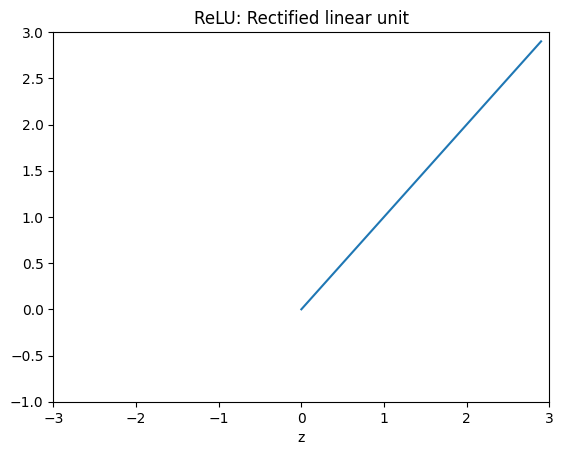

<Figure size 640x480 with 0 Axes>

In [15]:
# ReLU 함수 구현
def ReLU(x):
    if type(x) ==int or type(x) == float:
        if x<0:
            return 0
        else:
            return x
    elif type(x) == np.ndarray:
        for i in range(len(x)):
            if x[i] > 0:
                x[i] = x[i]
            else:
                x[i] = 0

        return x
x = np.arange(-3, 3, .1)
y = ReLU(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_ylim([-1.0, 3.0])
ax.set_xlim([-3.0, 3.0])
#ax.grid(True)
ax.set_xlabel('z')
ax.set_title('ReLU: Rectified linear unit')

plt.show()
fig = plt.gcf()

## 신경망 구현

In [16]:
def init_network():
    """
    W1,W2 : 가중치
    B1,B2 : 편향
    값은 일단 마음대로 지정한 값이니 신경쓰지 않으셔도 됩니다.
    """
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.7], [0.1, 0.3, 0.3, 0.7], [0.2, 0.1, 0.6, 0.8]]) # 3 x 4
    network['B1'] = np.array([0.11, 0.12, 0.13, 0.14]) # 4개
    network['W2'] = np.array([[0.1, 0.5], [0.2, 0.6], [0.3, 0.4], [0.35, 0.35]]) # 4 x 2
    network['B2'] = np.array([0.1, 0.5]) # 2개

    return network

In [17]:
# 순전파 함수 정의
def forward(network, x):
  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['B1'], network['B2']

 # 아래 빈칸 채워주세요
  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) +b2

  y = a2
  return y

In [18]:
# 네트워크 제작
network = init_network()

# 샘플 입력 데이터
x = np.array([1, 0.5, 0.7])

# 순전파 실행
y = forward(network, x)
print(y)

[0.81956037 1.7977893 ]


## 직접 신경망 만들어보기

In [23]:
# 랜덤 시드(Random Seed)를 고정합니다.
np.random.seed(405)

# X: 입력(inputs)
X = np.array([
    [0, 0]
    ,[0, 1]
    ,[1, 0]
    ,[1, 1]
])

# 편향(bias)
b = 1

# Y: 타겟값(target, correct outputs)
Y= np.array([[0],[1],[1],[1]])

In [24]:
# 시그모이드 함수
# net: 입력과 가중치의 가중합
def sigmoid(net):
    return 1/(1+np.exp(-net))
#위에서 구현한 코드 그대로


# 시그모이드 함수의 도함수 구현
# https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
def sigmoid_prime(net):
    sig = sigmoid(net)
    return sig * (1 - sig)     ##여기에 도함수 구현

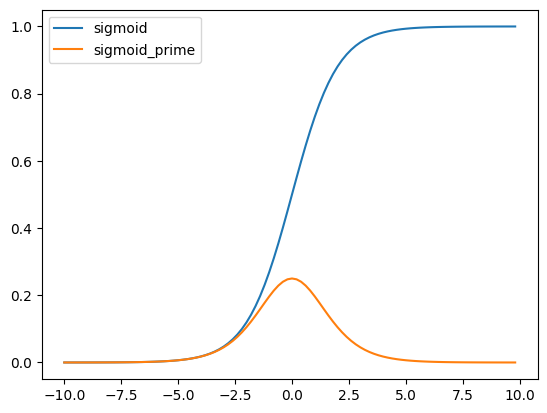

In [25]:
# 시그모이드 함수가 잘 생성되었는지 그래프를 출력해봅시다.
x_range = np.arange(-10., 10., 0.2)
y_range = np.array([sigmoid(x) for x in x_range])
y_prime = np.array([sigmoid_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='sigmoid')
plt.plot(x_range, y_prime, label='sigmoid_prime')
plt.legend()
plt.show();

In [26]:
# 초기 가중치
W = [0.40316676, -0.44345216]

# 입력 데이터와 가중치 연산
Z = np.array([X @ W + b]).T                   #Feedforward 연산 참고하여 코드 작성

"""
array([[1.        ],
       [0.55654784],
       [1.40316676],
       [0.9597146 ]])
"""

'\narray([[1.        ],\n       [0.55654784],\n       [1.40316676],\n       [0.9597146 ]])\n'

In [27]:
# A: 출력(activated outputs)
A = sigmoid(Z)
A

"""
array([[0.73105858],
       [0.6356534 ],
       [0.80268592],
       [0.72306466]])
"""

'\narray([[0.73105858],\n       [0.6356534 ],\n       [0.80268592],\n       [0.72306466]])\n'

## 미분한 값을 코드로 구현
=> 출력 오차를 줄이기 위한 역전파(경사하강법 이용)

경사 하강법(Gradient descent) : 손실 값이 최소가 되는 가중치(weight)를 찾는 방법
역전파 알고리즘 : 경사 하강법에 필요한 미분값을 빠르고 효율적으로 찾는 알고리즘

da = ∂E/∂A (MSE를 미분하여 나오는 값)
dz = ∂E/∂z
dw, db = 각각 가중치(weight), 편향(bias) 업데이트 값

In [42]:
def backpropagation(Y, A, Z):
    da = A - Y
    dz = sigmoid_prime(Z) * da
    dw = np.matmul(X.T, dz)
    db = np.matmul(sigmoid_prime(Z).T, da)

    print("dz : \n", dz, "\n")
    print("dw : \n", dw, "\n")
    print("db : \n", db, "\n")

    return dw,db


"""
dz :
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]]

dw :
 [[-0.08670498]
 [-0.13983613]]

db :
 [[-0.10753744]]
"""

'\ndz :\n [[ 0.14373484]\n [-0.084382  ]\n [-0.03125085]\n [-0.05545413]]\n\ndw :\n [[-0.08670498]\n [-0.13983613]]\n\ndb :\n [[-0.10753744]]\n'

In [29]:
print("기존 가중치: \n", W, "\n")
"""
기존 가중치:
 [[ 0.40316676]
 [-0.44345216]]
"""

기존 가중치: 
 [0.40316676, -0.44345216] 



'\n기존 가중치:\n [[ 0.40316676]\n [-0.44345216]]\n'

In [31]:
# 가중치 업데이트(batch)
dw, db = backpropagation(Y,A,Z)


W += dw
b += db

print("업데이트 후 가중치: \n", W, "\n")
print("업데이트 후 bias: \n", b, "\n")

"""
업데이트 후 가중치:
 [[ 0.31646178]
 [-0.58328829]]

업데이트 후 bias:
 [[0.89246256]]
"""

dz : 
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]] 

dw : 
 [[-0.08670498]
 [-0.13983613]] 

db : 
 [[-0.02735214]] 

업데이트 후 가중치: 
 [[ 0.31646178 -0.53015714]
 [ 0.26333063 -0.58328829]] 

업데이트 후 bias: 
 [[0.97264786]] 



'\n업데이트 후 가중치:\n [[ 0.31646178]\n [-0.58328829]]\n\n업데이트 후 bias:\n [[0.89246256]]\n'

In [44]:
## 최적 가중치 찾기
# 이미 입력 데이터와 타겟 출력은 윗 부분에서 선언함

# 가중치 초기화
# 아래 각주 코드 하나씩 실행하여 결과값 달라지는 확인해보시기 바랍니다

# W = 2 * np.random.random((2,1)) - 1
W =  [-0.79003947, 0.6826574 ]
# W = np.zeros((2,1))

b = 0

print('학습 전 가중치: \n', W)

# 가중치 업데이트 10,000회 (10,000 epoch)

for iteration in range(1000):

    # 순방향 전파
    Z = np.array([X @ W+ b]).T
    A = sigmoid(Z)

    # 역방향 전파(기울기 계산)
    backpropagation(Y, A, Z)

    W = np.array([[W[0]], [W[1]]])

    W += dw
    b += db

    W = [W[0][0], W[1][0]]
    b = b[0][0]


print('학습 후 가중치: \n', W, "\n")
print('학습 후 bias: \n', b, "\n")
print('학습 후 예측값: \n', A.round(3), "\n")

"""
학습 후 가중치:
 [[5.92060487]
 [5.92082351]]

학습 후 bias:
 [[-2.59025899]]

학습 후 예측값:
 [[0.07 ]
 [0.965]
 [0.965]
 [1.   ]]
"""

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [-8.37956594e-192]] 

dw : 
 [[-6.09137058e-137]
 [-8.13378162e-117]] 

db : 
 [[-8.13377812e-117]] 

dz : 
 [[ 2.21196938e-123]
 [-5.26446086e-117]
 [-3.66558512e-137]
 [-4.10305798e-192]] 

dw : 
 [[-3.66558512e-137]
 [-5.26446086e-117]] 

db : 
 [[-5.26445865e-117]] 

dz : 
 [[ 1.39954288e-123]
 [-3.40733861e-117]
 [-2.20582775e-137]
 [-2.00906406e-192]] 

dw : 
 [[-2.20582775e-137]
 [-3.40733861e-117]] 

db : 
 [[-3.40733721e-117]] 

dz : 
 [[ 8.85509666e-124]
 [-2.20534575e-117]
 [-1.32739410e-137]
 [-9.83739063e-193]] 

dw : 
 [[-1.32739410e-137]
 [-2.20534575e-117]] 

db : 
 [[-2.20534487e-117]] 

dz : 
 [[ 5.60273916e-124]
 [-1.42737498e-117]
 [-7.98781816e-138]
 [-4.81688245e-193]] 

dw : 
 [[-7.98781816e-138]
 [-1.42737498e-117]] 

db : 
 [[-1.42737442e-117]] 

dz : 
 [[ 3.54492867e-124]
 [-9.23845768e-118]
 [-4.80680447e-138]
 [-2.35858852e-193]] 

dw : 
 [[-4.80680447e-138]
 [-9.23845768e-118]] 

db : 
 [[-9.23845413e-118]] 

dz : 
 [[ 2

<ipython-input-24-353a2caf1249>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-net))


'\n학습 후 가중치:\n [[5.92060487]\n [5.92082351]]\n\n학습 후 bias:\n [[-2.59025899]]\n\n학습 후 예측값:\n [[0.07 ]\n [0.965]\n [0.965]\n [1.   ]]\n'

## IRIS DATA PERCEPTRON 학습예제

In [46]:
### 1. 필요한 패키지를 import 하고 Iris 데이터셋 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iris 데이터를 DataFrame 형태로 불러옵니다.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

### 아래 제공된 전처리 코드를 참고하여 자신만의 전처리 코드를 작성해봅니다.

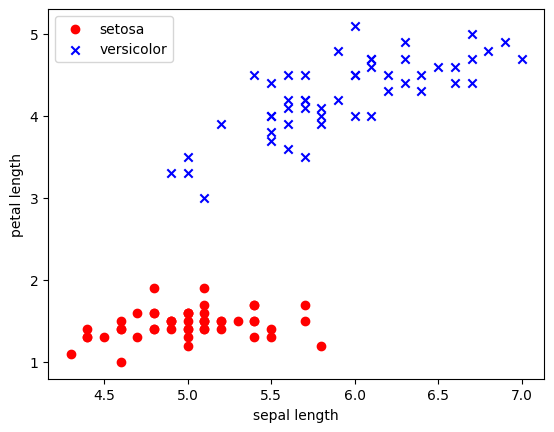

In [50]:

### 2. 데이터 전처리(Preprocessing) 및 시각화(Visualization)
# 50 setosa, 50 versicolor 데이터만 사용하여 이진 분류(Binary Classification) 문제를 풀어보겠습니다.

y = df.iloc[0:100, 4].values
y
"""
array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)
"""

# 타겟 레이블을 setosa = -1, versicolor = 1 로 바꾸기
y = np.where(y == 'Iris-setosa', -1, 1)
y
"""
array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])
"""

# 두 개의 특성(sepal length, petal length)만 사용
X = df.iloc[0:100, [0, 2]].values
X.shape
"""
(100, 2)
"""

# 두 특성에 따라 데이터 시각화
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scale = pd.DataFrame(scaler.fit_transform(df.iloc[:, [0,2]]), columns = ['Sepal Length',  'Petal Length'])
X_scale
X = X_scale.iloc[0:100, :].values

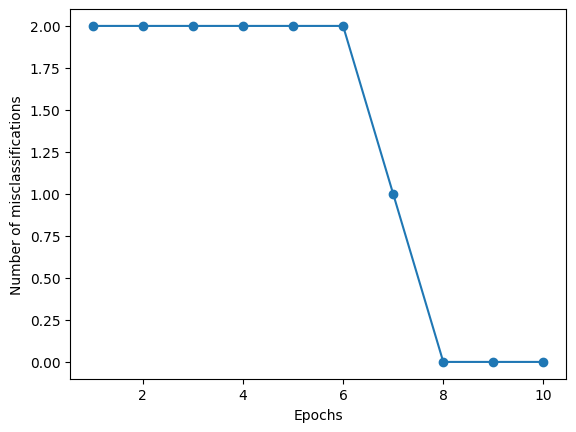

In [54]:
### 퍼셉트론(Perceptron)을 구현
class Perceptron:
    # niter = iteration 의 횟수입니다.
    # iteration에 대해서는 다음 강의에서 자세히 배울 것이므로 반복 횟수 정도로만 이해하셔도 충분합니다.
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """
        퍼셉트론을 학습시키는 코드입니다.

        X : 학습되는 데이터에 해당하는 벡터입니다.
        X.shape -> [샘플의 수, 특성의 수] 가 되어야 합니다.

        y : 타겟값입니다.
        y.shape -> [샘플의 수] 가 되어야 합니다.
        """

        # 초기 가중치는 [0, 0, 0] 으로 설정합니다.
        self.weight = np.zeros(1 + X.shape[1])

        # 오분류(mis-classification)된 데이터의 수
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """
        입력값을 받아 가중치, 편향과 연산해줍니다.
        """
        return np.matmul(X, self.weight[1:]) + self.weight[0]                                                                  #코드 채워 넣기

    def predict(self, X):
        """
        학습 후 가중치를 바탕으로 데이터의 클래스를 예측합니다.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


### 4. 퍼셉트론에 데이터 넣어 가중치를 학습
# 학습률(learning rate): 0.1, iteration(epoch): 10
# 퍼셉트론을 학습시키고 오분류(mis-classification)의 변화를 살펴보겠습니다.
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

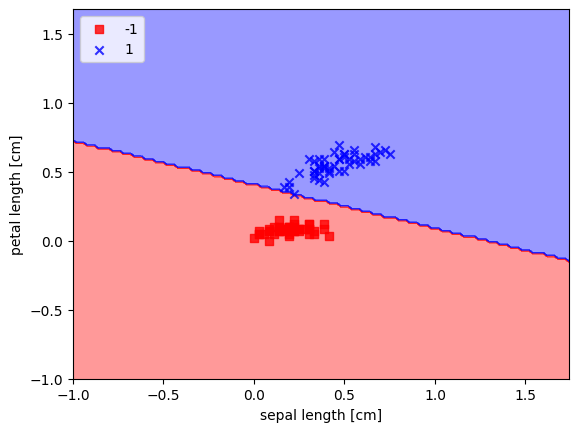

In [56]:
### 데이터가 잘 분류 되었는지 확인
# 퍼셉트론의 결정 경계를 확인해 보겠습니다.
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 그래프 요소를 세팅하여줍니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계면을 그려보겠습니다.
    x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, color=cmap(idx),
        marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## 고생하셨습니다